In [44]:
## Titanic Survival Prediction
# Titanic Survival Prediction using Random Forest and Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [45]:
train_df = pd.read_csv("train.csv")
train_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

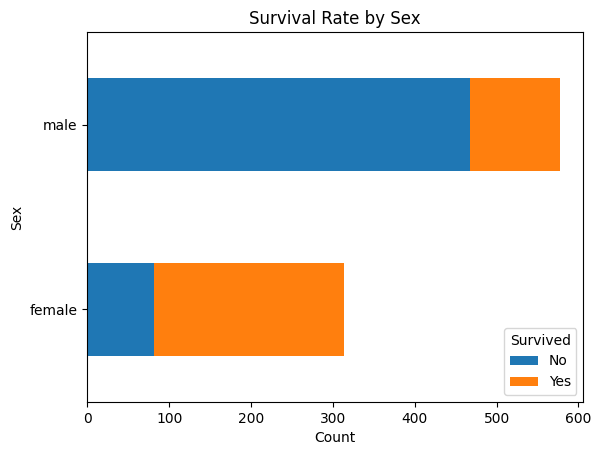

In [41]:
# Survival count by sex using pandas groupby
survival_counts = train_df.groupby(['Sex', 'Survived']).size().unstack()

# Plot it using pandas plot 
survival_counts.plot(kind='barh', stacked=True)
plt.title("Survival Rate by Sex")
plt.xlabel("Count")
plt.ylabel("Sex")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


In [ ]:
# Separate features and target variable
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

#  Define Preprocessing Steps
# Define which columns are which type
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Create a preprocessing pipeline for numeric features
# This will fill missing values with the median and then scale the features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Create a preprocessing pipeline for categorical features
# This will fill missing values with the most frequent value and then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Use ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#  Create Full Model Pipelines
# This chains the preprocessing steps with the model training
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(random_state=42, max_iter=200))])

#  Split Data and Train
# Now we split the raw data. The pipeline handles all fitting and transforming correctly.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipeline.fit(X_train, y_train)
logreg_pipeline.fit(X_train, y_train)

#  Evaluate
rf_preds = rf_pipeline.predict(X_test)
log_preds = logreg_pipeline.predict(X_test)

print("--- Random Forest Report ---")
print(classification_report(y_test, rf_preds))

print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, log_preds))


# Cross-Validation (on the entire dataset)
print("\n--- Cross-Validation Scores ---")
rf_cv_score = cross_val_score(rf_pipeline, X, y, cv=5).mean()
log_cv_score = cross_val_score(logreg_pipeline, X, y, cv=5).mean()

print(f"Random Forest CV Mean Accuracy: {rf_cv_score:.4f}")
print(f"Logistic Regression CV Mean Accuracy: {log_cv_score:.4f}")


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


--- Cross-Validation Scores ---
Random Forest CV Mean Accuracy: 0.8059
Logistic Regression CV Mean Accuracy: 0.7901
